In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# path to the compressed ROL dataset
path_rol_comp = "C:/Cours-Sorbonne/M1/Stage/src/data/rol_compressed" 
# path to the extracted images similar ROL dataset
path_sim_rol_extract_nn_comp = "C:/Cours-Sorbonne/M1/Stage/src/data/similaires_rol_extracted_nn_compressed"

In [3]:
import numpy as np
import cv2
import os

img_matched_1 = cv2.imread(f"{path_sim_rol_extract_nn_comp}/bpt6k4627016t_f3_04_0.944.jpg"),
img_matched_2 = cv2.imread(f"{path_sim_rol_extract_nn_comp}/bpt6k11964145_f1_01_0.996.jpg"),
img_matched_3 = cv2.imread(f"{path_sim_rol_extract_nn_comp}/bd6t512924998_f5_01_0.998.jpg"),

img_to_match = "btv1b53225590q"
img_simlaire = cv2.imread(os.path.join(path_rol_comp, img_to_match + ".jpg"))

In [4]:
def compute_mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err        

In [5]:
from tqdm import tqdm
all_images_sim = []
for img in tqdm(os.listdir(path_sim_rol_extract_nn_comp)):
    all_images_sim.append(cv2.imread(f"{path_sim_rol_extract_nn_comp}/{img}"))

100%|██████████| 6480/6480 [01:12<00:00, 89.46it/s] 


In [6]:
from utils.Plotter import Plotter as PL

def get_best_matches(all_images_sim, nb_match=3):
    best_matches = []
    for image in tqdm(all_images_sim):
        try:
            mse = compute_mse(img_simlaire, image)
            if mse is not None:
                best_matches.append((image, mse))
        except:
            continue

    best_matches = sorted(best_matches, key=lambda x: x[1])[:nb_match]
    return best_matches

best_matches = get_best_matches(all_images_sim)

100%|██████████| 6480/6480 [03:18<00:00, 32.70it/s]


In [12]:
best_matches[0][1]

10305.077329812744

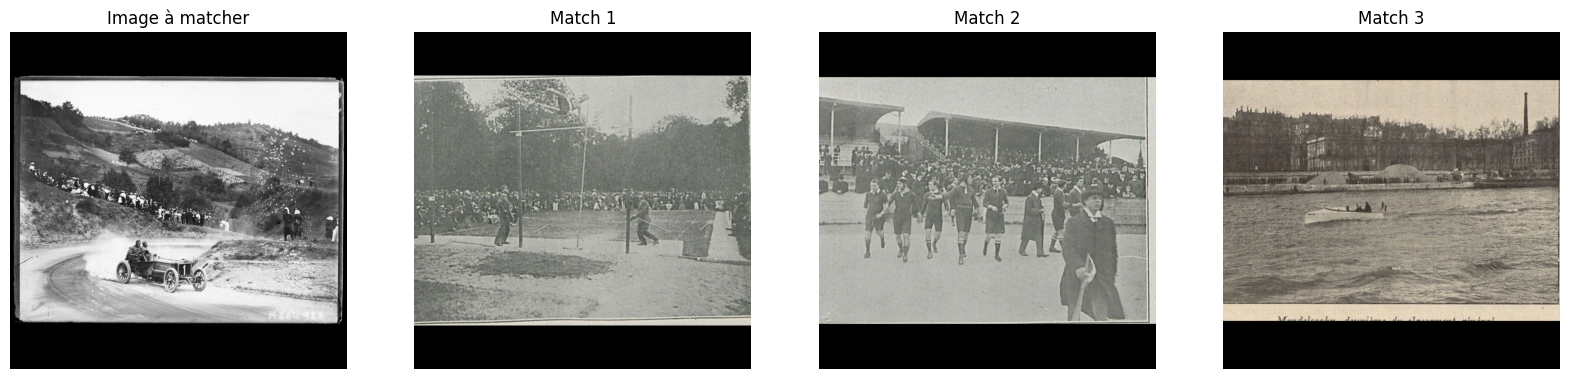

In [14]:
PL.plot_images([img_simlaire, best_matches[0][0], best_matches[1][0], best_matches[2][0]], ["Image à matcher", "Match 1", "Match 2", "Match 3"], (20,20
))